# 다중 출력 시계열 회귀

- 타겟변수 y가 하나의 값을 갖는 것이 아니라 다수의 값(시계열)을 갖는 경우

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from numpy.random import rand, randn

## 입력 및 출력 데이터 생성
- 시스템의 입력과 출력 데이터 생성 함수
- y가 시계열 데이터인 경우

In [4]:
x = np.arange(12); print(x)
y = np.cumsum(x); y

[ 0  1  2  3  4  5  6  7  8  9 10 11]


array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45, 55, 66])

In [5]:
def gen_random_xy(n_steps=30):
    a = 0.5 + rand() # 0.5 ~ 1.5 사이의 임의의 레벨 선택
    xs = np.linspace(0,6,n_steps)
    ys = -0.1*a*xs*(xs -6) # y = -a*x(x-6) 거리가 6 나가는 포물선
    out = np.cumsum(ys**2 + 0.5*xs*rand(n_steps)) # x**2 값 적분 및 노이지 추가
    return ys, out

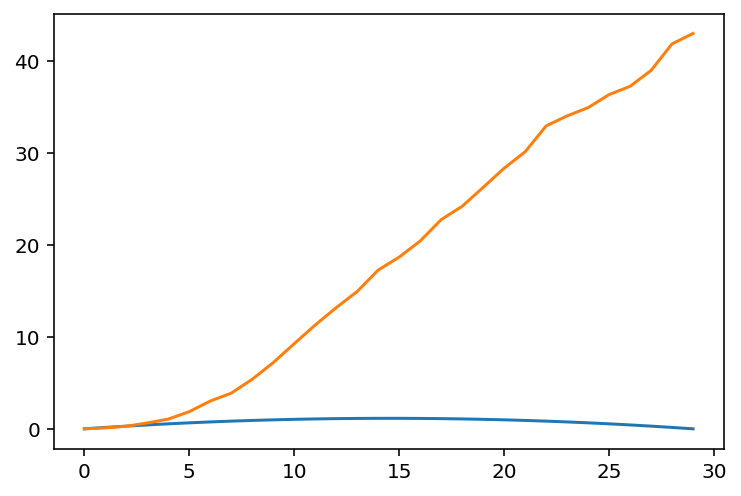

In [6]:
in_x, out = gen_random_xy(30)
plt.plot(in_x)
plt.plot(out); plt.show()

In [7]:
# 입력 및 출력 데이터 샘플 생성
N = 200 # 입력 샘플 수
n_steps = 30
X, y = [],[]
for i in range(N):
    in_x, out = gen_random_xy(n_steps)
    X.append(in_x)
    y.append(out)
X = np.array(X)
y = np.array(y)

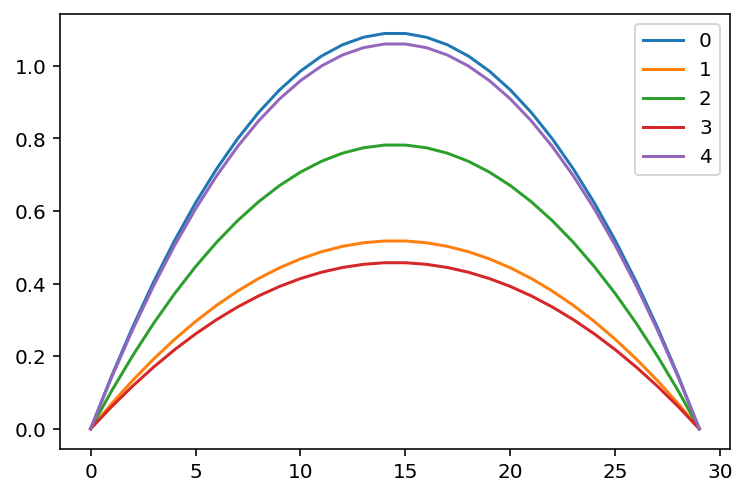

In [8]:
for i in range(5):
    plt.plot(X[i], label=str(i))
    plt.legend()

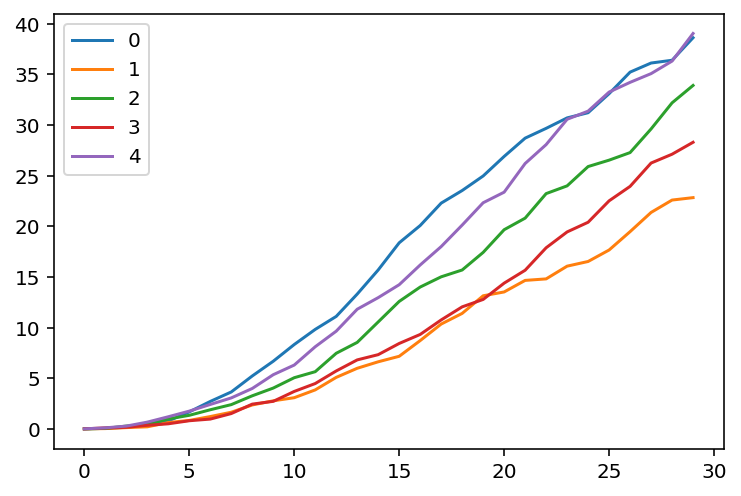

In [9]:
for i in range(5):
    plt.plot(y[i], label=str(i))
    plt.legend()

In [11]:
X.shape, y.shape

((200, 30), (200, 30))

In [12]:
X_all = X.copy()

### 모든 입력 데이터를 사용한 다중회귀 예측

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y, random_state=9)

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rfr = RandomForestRegressor(n_estimators=20)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20)

## 컬럼별로 r2 구하기
- 30개의 컬럼(시계열 데이터)이 있다
- 각 컬럼별로 r2 구하기

In [18]:
x = np.arange(24).reshape(6,4)
print(x)
# (1)
x.sum(axis=1) # 세로방향, 컬럼별 연산(평균, r2 등) 다중 목적 변수 y1, y2, y3, y4)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


array([ 6, 22, 38, 54, 70, 86])

In [140]:
# (2)
x.mean(axis=1) # 가로방향, 행단위 연산(평균, r2 등을 구할 때도 있다) - 향후 12개월 매출 예측

array([ 1.5,  5.5,  9.5, 13.5, 17.5, 21.5])

In [19]:
y_pred = rfr.predict(X_test)
# 아래는 의미 없는 결과

r2_score(y_test, y_pred, multioutput="raw_values")

array([ 1.        , -0.3844858 , -0.05020786,  0.16574114,  0.44854944,
        0.62298207,  0.71654911,  0.75260245,  0.84265886,  0.88564822,
        0.89009882,  0.92300026,  0.93148039,  0.9303506 ,  0.92606795,
        0.92608555,  0.93125228,  0.9222013 ,  0.91349022,  0.9193763 ,
        0.91768033,  0.91413995,  0.91005997,  0.90718489,  0.92259228,
        0.90701436,  0.89255217,  0.88040899,  0.875487  ,  0.85057876])

In [142]:
r2_score(y_test, y_pred, multioutput="raw_values").mean()

0.7321453036271137

## 행별로 R2 구하기
- 샘플별, 시계열 데이터를 대상으로 r2 구하기

In [143]:
y_test.shape

(50, 30)

In [20]:
r2_score(y_test.T, y_pred.T, multioutput="raw_values")

array([0.93213799, 0.99342162, 0.98797543, 0.97017717, 0.98544333,
       0.99861438, 0.99256305, 0.97247753, 0.99745142, 0.87537213,
       0.99284245, 0.98428718, 0.99350578, 0.98209927, 0.9867977 ,
       0.99848335, 0.98551282, 0.95481444, 0.99650218, 0.98203426,
       0.99733483, 0.95916199, 0.99114373, 0.99355559, 0.99266283,
       0.97053958, 0.974061  , 0.99713406, 0.98965142, 0.96579832,
       0.97796523, 0.99236392, 0.95178714, 0.9901766 , 0.97325195,
       0.91399148, 0.99265635, 0.99153129, 0.99619794, 0.98666911,
       0.96290714, 0.99005842, 0.99379719, 0.98898062, 0.97424672,
       0.95439824, 0.94391375, 0.99717635, 0.9955125 , 0.97494428])

In [145]:
# 트릭
r2_score(y_test.T, y_pred.T, multioutput="raw_values").mean()

0.975049719556423

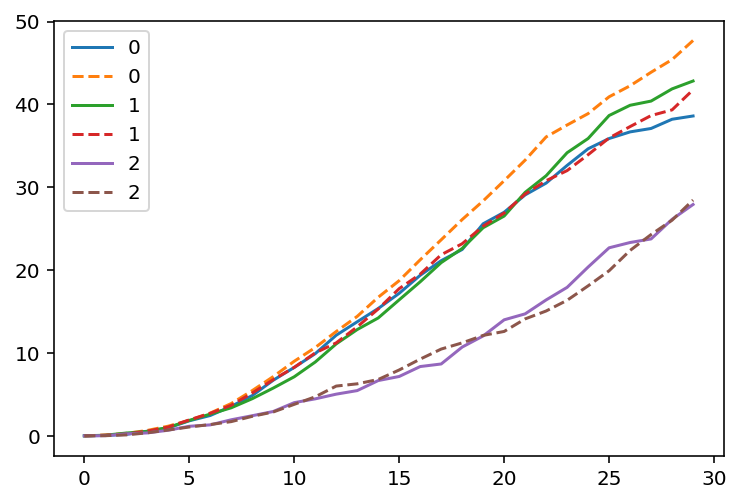

In [23]:
# 실제값과 예측치 (행 단위)
for i in range(0,3):
    plt.plot(y_test[i], label=str(i))
    plt.plot(y_pred[i], '--', label=str(i))
    plt.legend()

### 입력으로 30개가 아닌 일부 샘플만 사용하는 경우

In [24]:
X.shape

(200, 30)

In [25]:
# 일부 샘플 5개만 사용하는 경우
# n_interval = 5
# xn = np.int(n_steps/n_interval)
# x_sample = [xn*(i+1)-1 for i in range(n_interval)]

# 5개 위치 샘플만 입력(X)으로 사용

x_sample = [5, 11, 17, 23, 29]
X_part = X[:,x_sample]

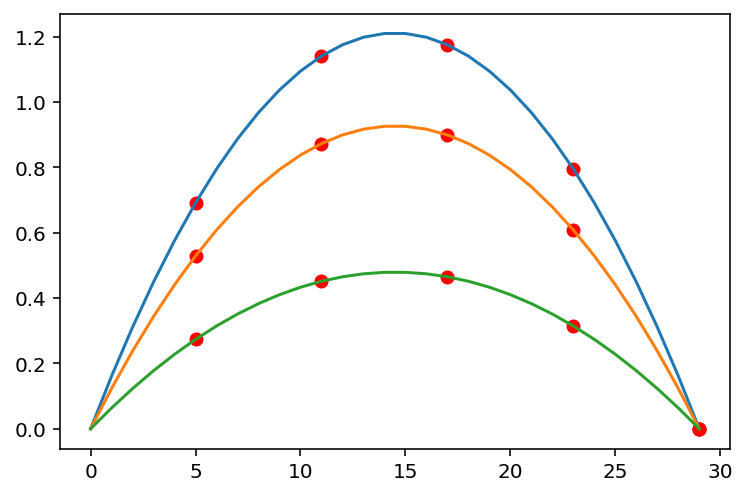

In [149]:
for i in range(3):
    plt.plot(X[i])
    plt.scatter(x_sample, X_part[i], c='r')

### 성능 비교

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_part, y, random_state=9)
X_train.shape, y_train.shape

((150, 5), (150, 30))

In [27]:
rfr = RandomForestRegressor(n_estimators=20)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

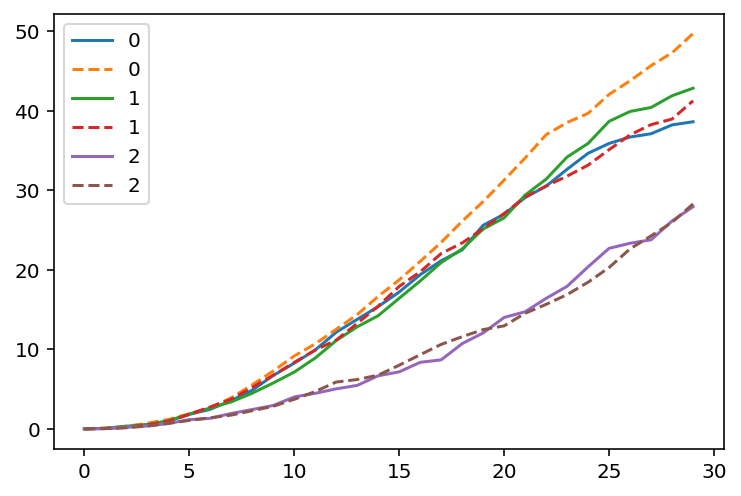

In [28]:
for i in range(3):
    plt.plot(y_test[i], label=str(i))
    plt.plot(y_pred[i], '--', label=str(i))
    plt.legend()

In [29]:
r2_score(y_test.T, y_pred.T, multioutput="raw_values").mean()

0.9763937170869648

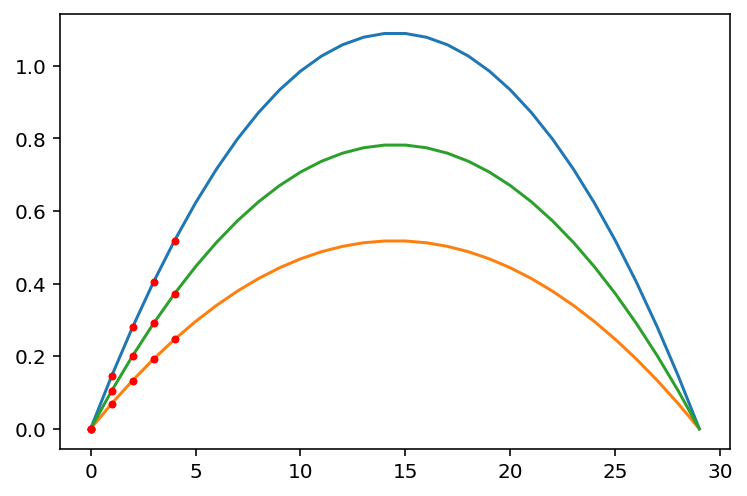

In [31]:
# 다른 예제: 앞 부분의 일부(5개) 샘플만 사용하는 경우
X_part = X[:,:5]
for i in range(3):    
    plt.plot(X[i])
    plt.plot(X_part[i], 'r.')

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_part, y, random_state=9)
rfr = RandomForestRegressor(n_estimators=20)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
r2_score(y_test.T, y_pred.T, multioutput="raw_values").mean()

0.9789044235116665

In [156]:
X_test.shape, y_test.shape

((50, 3), (50, 30))